# Computational Neuroscience Crash Course (2019)
** Arthur Leblois & Nicolas P. Rougier**, Institute of Neurodegenerative Diseases, Bordeaux, France.  
Course material and program at https://github.com/rougier/CNCC-2019


## Sort the birds!

<img style="float: right; padding-left:1em;" src="./pixar.jpg">

The goal of this project is to sort (automatically) audio files that correspond to the recording of adult or juvenile songbirds. If you listen to some random audio files, you will hear that the sound is quite different between from one file to the other. Some correspond to adults (song) and some others correspond to juveniles (babbling).

Since the sound is diffrent, this means we can probably process the audio files in order to decide if it corresponds to an adult or a juvenile and the goal of this project is to do just that.

In the end, we want to have small Python script (less than 100 line) that will automatically sort all the files, either by moving them into some directory or by writing a text file describing the type for each record.

To do so, we'll need to manipulate a lot of different notions (such as resampling, filtering, enveloppe, auto-correlation, fit) and to check our implementation is correct.


Let's start by first **getting the data** that is available [here](https://bfs.u-bordeaux.fr/telecharge.php?choix=files/7d41741dabba9bcad96ac304fd672d32/records.zip) (until 13/07/2019).  
 Once downloaded, you can unzip it in directory where you have your notebook saved.



### Configuration of the notebook

We need first to setup a few options in the notebook such as to have inline plots as well as a nicer output on OSX.  
There is not much to understand here, these options are documented in the [Jupyter notebook documentation](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html)

In [1]:
# Ask jupyter to display plots inline
%matplotlib inline

# OSX specific (for a nicer display on "retina" screen)
%config InlineBackend.figure_format = 'retina'

**Note**: In order to run the code in a specific code cell, you'll have to type `shift`+`return` on the selected cell. If you do that manually, you'll have to run each cell from top to bottom (order is important). If you want to run all the cell, you can also click the run button at the top of the notebook. To edit a cell (code or text), double-click in it.

###  Loading libraries

Next step is to load all the Python libraries that will be needed for processing & displaying our data. Namely:
* [NumPy](https://www.numpy.org/) which is the fundamental package for scientific computing with Python.
* [Matplotlib](https://matplotlib.org/) which is a plotting library that produces publication quality figures. 
* [SciPy](https://www.scipy.org/) which is a Python-based ecosystem of open-source software for mathematics, science, and engineering.
* [IPython](https://ipython.org/) that provides a rich architecture for interactive computing

Note that during this course, we'll only use a small part of IPython (to play sound).

In [2]:
# Numerical package
import numpy as np

# Signal processing
import scipy.signal

# Package to display figures
import matplotlib.pyplot as plt

# Package to read wav files
from scipy.io import wavfile

# Package to display widgets inside the notebook
from IPython.display import Audio, display

### Loading data

The first thing to do is to load our data from a local file that must be present in your `data` directory. To do that, we'll write a `get_data` function that reads a `wav` filename (`wav` file are sound files encoded in the [Waveform audio file format](https://fr.wikipedia.org/wiki/Waveform_Audio_File_Format)) using a dedicated function of scipy.

In [3]:
def get_data(filename = None):
    rate, signal = wavfile.read(filename)
    return rate, signal

We can now load some data and check for their properties.

In [4]:
filename = "./records/record-001.wav"
rate, S = get_data(filename)

print("Frequency: {:.1f}kHz".format(rate/1000))
print("Length: {}".format(len(S)))

Frequency: 44.1kHz
Length: 530833


#### Exercise
The file has been read and we know that the frequency is 44.1 kHz and the number of data points is 530833. Try to compute the duration of the signal.

In [5]:
# Solution to the exercise
duration = len(S)/rate
print("Frequency: {:.1f}kHz".format(rate/1000))
print("Duration: {:.2f} second(s)".format(duration))

Frequency: 44.1kHz
Duration: 12.04 second(s)



###  Visualizing data

We can now display our data using the `plot` function from matplotlib. To do that, we need to have the X and Y coordinates of points. The Y data is given by the signal (S) but we need to generate the corresponding X data. Knowing the duration and the number of Y data, we can write X using the numpy [linspace(start,stop,num)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) function as:

In [6]:
T = np.linspace(0, duration, len(S))

We're now ready to create a new figure and plot our data

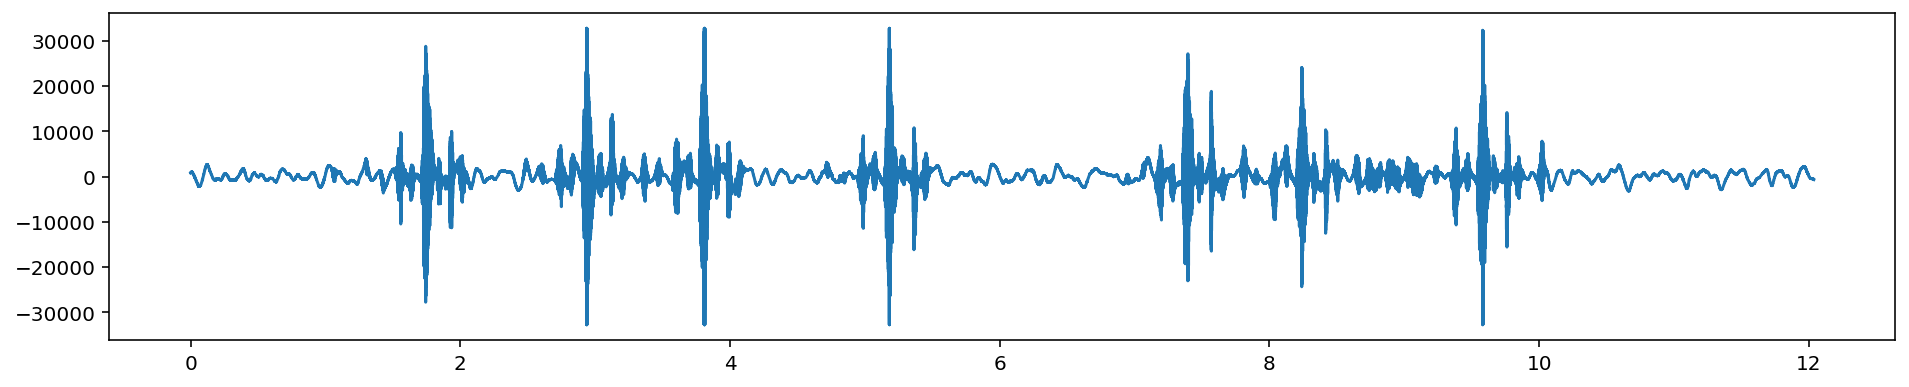

In [7]:
plt.figure(figsize=(16,3))
plt.plot(T, S);

If you want to see only a subpart of the signal, you can limit explicitely the x range using the [xlim(xmin,xmax)](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html) function as shown below where we modified the y range as well using the [ylim(ymin,ymax)](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylim.html)

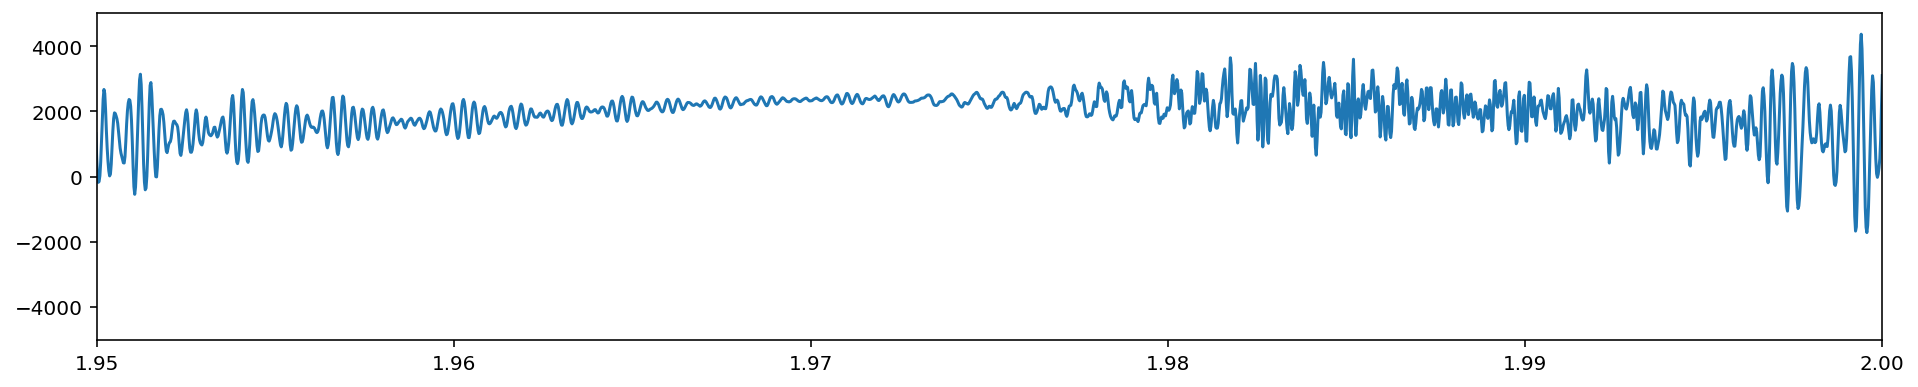

In [8]:
plt.figure(figsize=(16,3))
plt.plot(T, S);
plt.xlim(1.95,2.0);
plt.ylim(-5000,5000);

Furthermore, and knowing our data is an audio file, we can benefit from a better visualization using the [specgram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.specgram.html) function of matplotlib that is dedicated to the visualization of spectrogram.

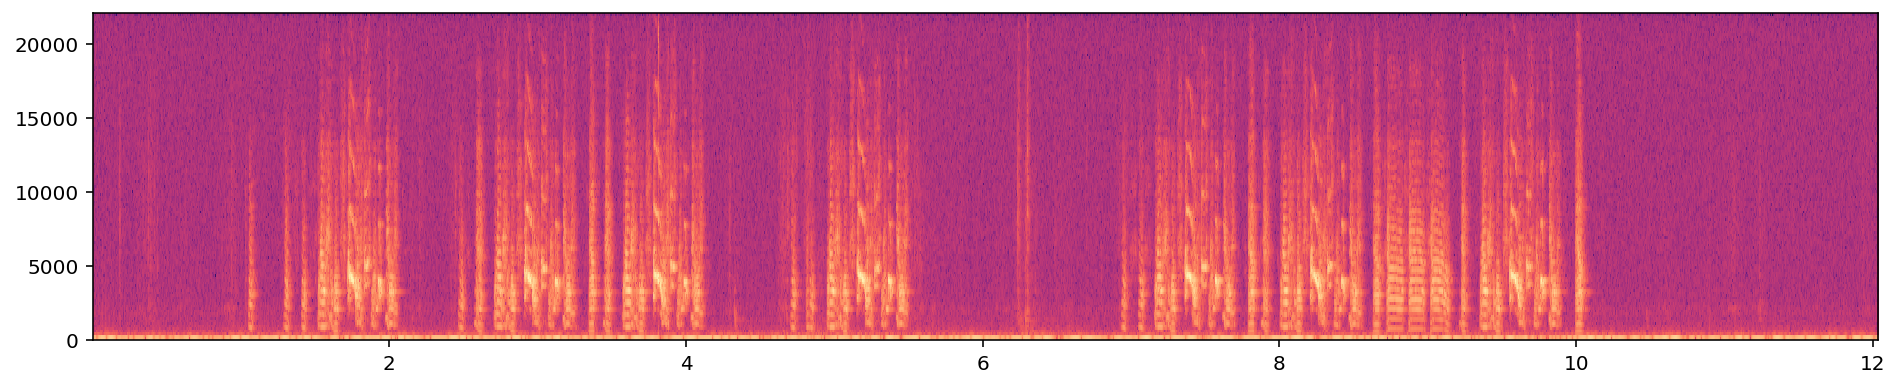

In [9]:
plt.figure(figsize=(16,3))
plt.specgram(S, Fs=rate, cmap="magma");

And last, but not least, using the IPython library, we can display a widget in order to play the file.

In [10]:
# Display a widget to play the sound
display(Audio(filename))

## Project

### 1. Denoising and smoothing

Before going any further in our processing, we need to remove noise originating from recording default and ambient noise. We'll use a [high-pass filter (HPF)](https://en.wikipedia.org/wiki/High-pass_filter) that is  *an electronic filter that passes signals with a frequency higher than a certain cutoff frequency and attenuates signals with frequencies lower than the cutoff frequency* (Wikipedia). To do that, we first need to build a filter among [those available](https://docs.scipy.org/doc/scipy/reference/signal.html) and apply the filter to the signal.

Then, we want to smooth the signal by averaging each value with neighboring values, using a small temporal window. To do that, we first need to define the neighboring range (in seconds). Then we define a gaussian signal over this range and centered in the middle and finally we compute the smooth signal.

You will denoise and smooth some signals (n=8) and produce a unique figure showing the result.

### 2. Resampling and  auto-correlation

In this part, we are interested in computing the auto-correlation of the signal, that is, the correlation of the signal by itself. Howewer, since the signal is quite large, you'll need first extract only a few points linearly spread over the signal and only then compute the auto-correlation. After computing the autocorrelation for some signals, start to think of a method to separate adults from juveniles.


### 3. Fitting and sorting

You will try to fit the differen signals with a Gaussian and score all the different signals. Then, by plotting the histogram of these scores, you'll decide on a criterion to separate adults from juveniles.

